### Image

#### Image is made up of large number of pixels. Pixels are the small sqaures with RGB depth. Each pixel has its own combination of RGB values ranging from 0 to 255 (O being the least depth of the color).

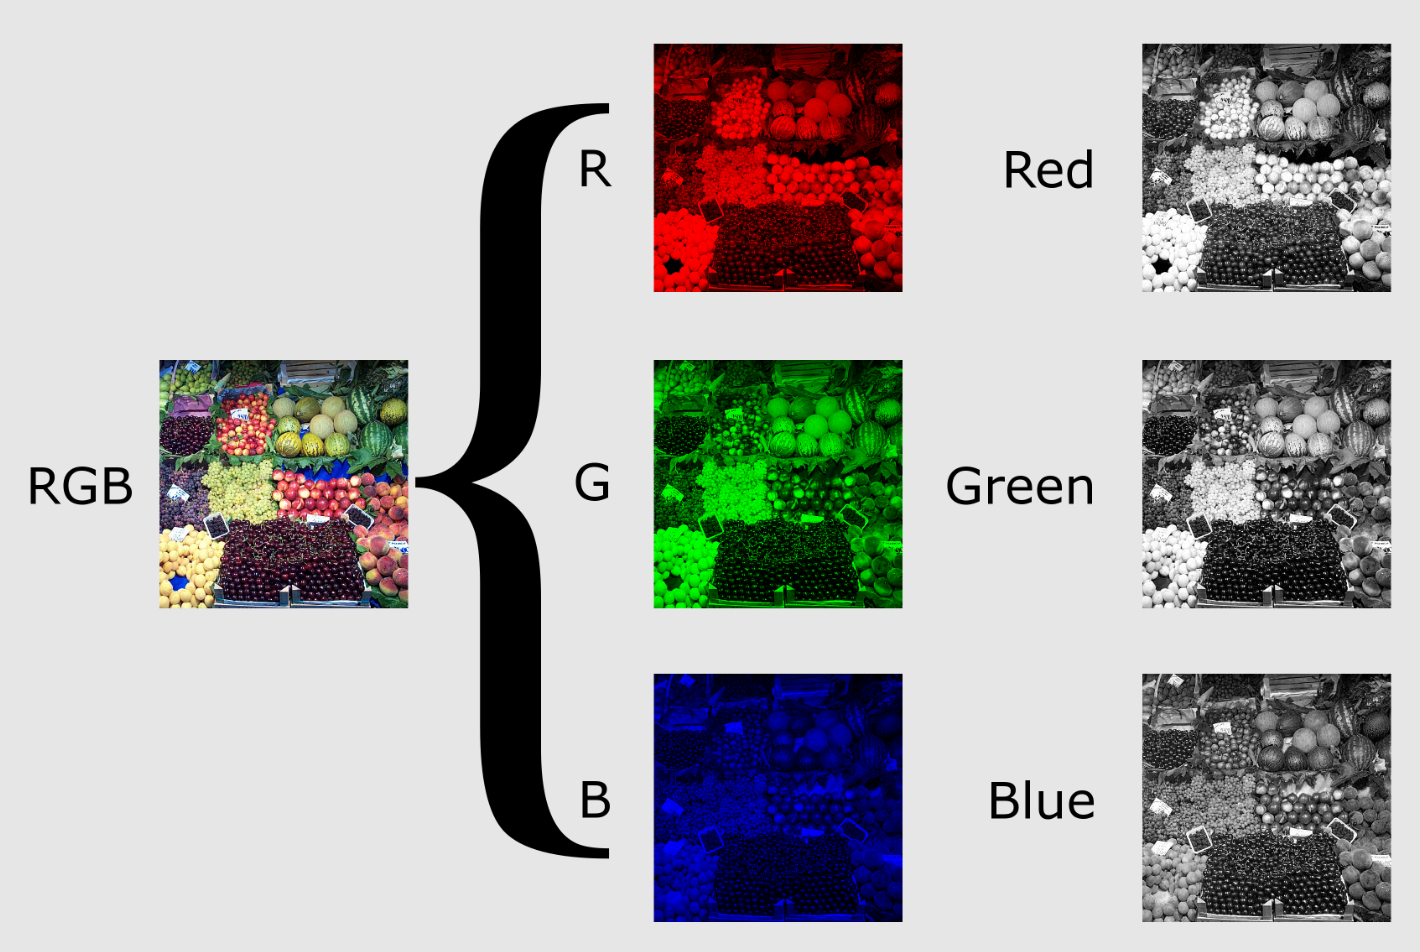

"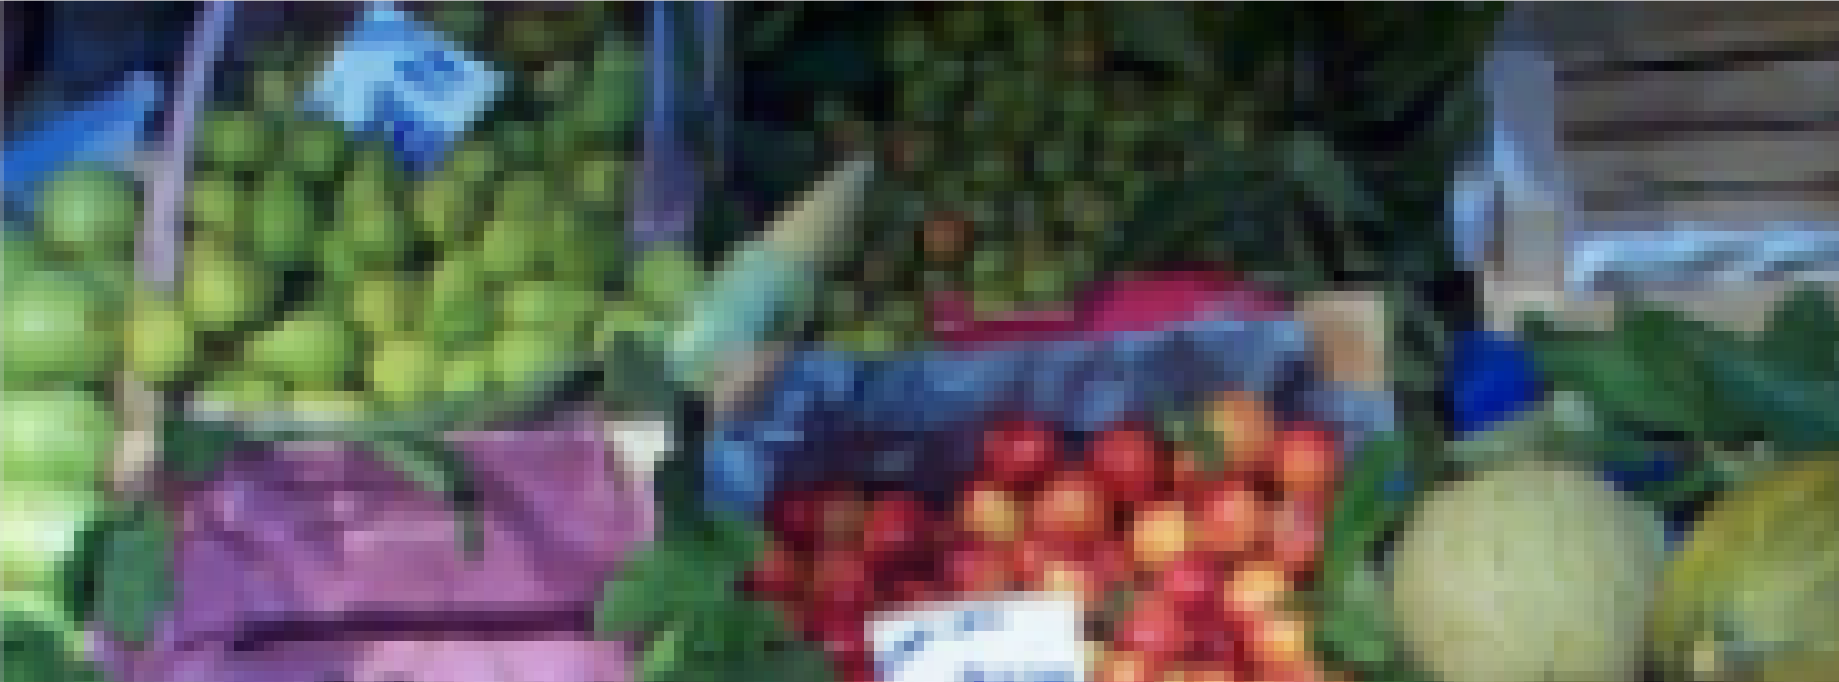

### FITS System


#### FITS (Flexible Image Transport System) is an open standard used for storing data in digital file format. 
#### FITS is commonly used in astronomical surveys, specifically for astronomical data, and includes photometric and spatial calibration information, together with image origin metadata.
#### FITS system is more than just a image format, and is maily used to store scientific data sets consisting of multidimensional arrays(images) and 2-D tables organized as rows and columns of information.

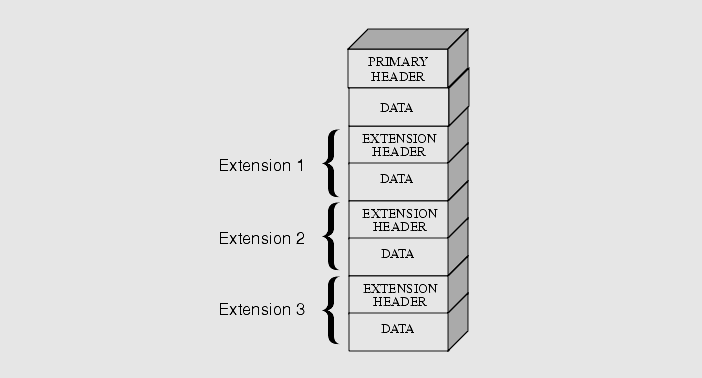

#### FITS system stores the data in the format of Header/Data Units (HDUs). In this, first HDU is called as primary HDU or primary array. This section contains a multi-dimentional(1-999) array of byte integers or floating point numbers using IEEE representations. A typical primary array could contain a 1-D spectrum, a 2-D image, or a 3-D data cube.

#### Read more about FITS file system - [FITS](https://fits.gsfc.nasa.gov/fits_primer.html)

### Introduction to Astroquery

#### Astroquery is a python library sepcifically designed for querying astronomical databases and web services. It allows reseachers an access to wide pool of astronomical data sources, such as Hubble Space Telescope, the Sloan Digital Sky Survey, NASA's Exoplanet Archive, and many others. Astroquery can seamlessly integrated with Astropy (python library that provides powerful data processing tools).

#### Astroquery handles data acquisition from various sources, while Astropy provides tools for detailed data analysis and manipulation.

SkyView Query Form:- https://skyview.gsfc.nasa.gov/current/cgi/query.pl

<img src='http://www.messier-objects.com/wp-content/uploads/2015/04/Messier-32-Messier-31-and-Messier-110.jpg' width = 50%>

In [4]:
#Installing Astroquery
%pip install astroquery

Note: you may need to restart the kernel to use updated packages.


#### Using Skyview class to fetch required data

In [5]:
#Importing required libraries
#SkyView class of astroquery library provides methods to get data of celestial coordinates from different surveys. 
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt

In [6]:
import astropy.units as u

In [7]:
#Getting the Andromeda galaxy data from SDSSs survey using Skyview class
hdu = SkyView.get_images("M31", "DSS2 Blue",pixels=600,
                         radius=150*u.arcmin)[0][0]
hdu

In [8]:
dir(hdu)

['_EXCLUDE',
 '_MASK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_bitpix',
 '_blank',
 '_bscale',
 '_buffer',
 '_bzero',
 '_calculate_checksum',
 '_calculate_datasum',
 '_char_encode',
 '_checksum',
 '_checksum_valid',
 '_close',
 '_compute_checksum',
 '_compute_hdu_checksum',
 '_convert_pseudo_integer',
 '_data_loaded',
 '_data_needs_rescale',
 '_data_offset',
 '_data_replaced',
 '_data_size',
 '_datasum',
 '_datasum_valid',
 '_default_name',
 '_do_not_scale_image_data',
 '_dtype_for_bitpix',
 '_encode_byte',
 '_file',
 '_from_data',
 '_gcount',
 '_get_raw_data',
 '_get_scaled_image_data',
 '_get_timestamp',
 '_has_data',
 '_hdu_regis

#### Getting into a data

In [9]:
#Header stores the metadata 
M31_header = hdu.header
hdu.header

SIMPLE  =                    T / Written by SkyView Fri Sep 13 12:02:22 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [10]:
#Data contains the array of pixel data from HDU
M31_data = hdu.data
hdu.data

array([[ 9129.,  9654.,  8932., ...,  8553., 10282.,  9129.],
       [ 9348.,  9511.,  8694., ...,  8862.,  8557.,  9007.],
       [ 8647., 13497.,  8787., ...,  8717.,  8862.,  9171.],
       ...,
       [10021.,  9664.,  9675., ...,  9435., 11916.,  9494.],
       [ 9820.,  9779.,  9783., ...,  9600.,  9659.,  9637.],
       [ 9740.,  9658.,  9448., ...,  9312.,  9612.,  9649.]],
      dtype=float32)

In [11]:
#Checking the type of data we got from HDU
#type(M31_header)
type(M31_data)

numpy.ndarray

In [12]:
#Checking the shape of array
M31_data.shape

(600, 600)

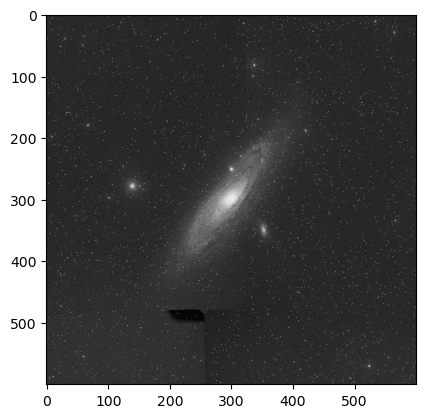

In [13]:
#Plotting the image based on survey data
#Here we are using imshow() function of matplotlib to display the grayscale image in a figure
#By default color map is viridis
plt.imshow(M31_data, cmap='gray')

##### In above image we can see that y axis is inverted. We will use attribute origin (lower) in imshow function to make the appropriate changes. Also we can change the colormap to gray to get similar image as we got from online survey.

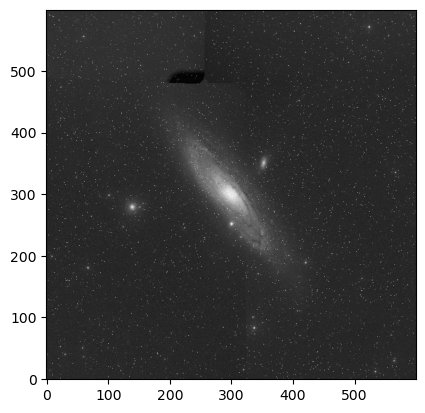

In [14]:
plt.imshow(M31_data, origin='lower', cmap= 'gray')

### Andromeda Galaxy with DSS2 Blue survey

#### In above fetched image, we used survey SDSSg to get the data. Now, we are using a different survey which gives us the more familiar image data of andromeda galaxy. 
#### Here we will be getting 600x600 pixel image to get better view of the astronomical objects. 
#### Also we are specifying the angular radius of M31 to have a wider and detailed view. We provide radius argument in arcminute unit.  


#### Astropy 
##### It is a widely used python library for astronomy and astrophysics. It provides functions such as unit conversion, performing arithmetic with physical quantities, handling logarithmic units such as magnitude and decibel. It provides classes for storing and manipulating structured astronomical data like star positions or astronomical catalogs.

In [15]:
#Here we are using astropy units package which provides arcmin that converts the given angle in arcminute.
import astropy.units as u

In [16]:
hdu = SkyView.get_images("M31", "DSS2 Blue",
                         pixels=600,
                         radius=150*u.arcmin)[0][0]

In [17]:
#Getting data from hdu in separate variable
M31_DSS2_Pixels = hdu.data
M31_DSS2_Pixels

array([[ 9129.,  9654.,  8932., ...,  8553., 10282.,  9129.],
       [ 9348.,  9511.,  8694., ...,  8862.,  8557.,  9007.],
       [ 8647., 13497.,  8787., ...,  8717.,  8862.,  9171.],
       ...,
       [10021.,  9664.,  9675., ...,  9435., 11916.,  9494.],
       [ 9820.,  9779.,  9783., ...,  9600.,  9659.,  9637.],
       [ 9740.,  9658.,  9448., ...,  9312.,  9612.,  9649.]],
      dtype=float32)

In [18]:
#Making sure the pixel size of data is as specified (600x600)
M31_DSS2_Pixels.shape

(600, 600)

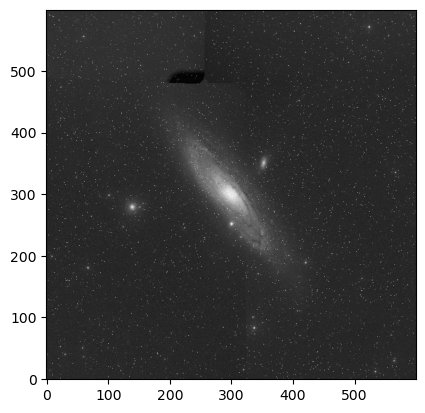

In [19]:
#Plotting the image
plt.imshow(M31_DSS2_Pixels, cmap='gray', origin='lower')

### Creating our own FITS file.

In [20]:
#Importing fits package from Astropy IO module
from astropy.io import fits

In [21]:
'''Steps to create new fits file'''

#Creating a list of HDUs
hdu_list = fits.HDUList()

#Creating a primary HDU
p_hdu = fits.PrimaryHDU()

#Adding data and header in primary HDU
p_hdu.data = M31_data
p_hdu.header = M31_header

#Appending our primary HDU in HDU list
hdu_list.append(p_hdu)

#Saving our fits file
hdu_list.writeto('Test7_FITS_file.fits')

#### Accessing newly created FITS file

In [22]:
#Opening fits file
My_fits = fits.open('Test_FITS_file.fits')
My_fits

In [23]:
My_fits[0].header

SIMPLE  =                    T / Written by SkyView Fri Aug 16 20:39:32 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [24]:
test_data = My_fits[0].data

In [25]:
#Checking the shape
test_data.shape

(300, 300)

In [26]:
#Checking type of data
type(test_data)

numpy.ndarray

### Pixel Scaling

#### Following image generated by survey data highlights the center part of the andromeda galaxy, other stars/objects are not clearly visible. To get the more clearer/brighter output, which will be easier to understand, we will have to perform pixel scaling.

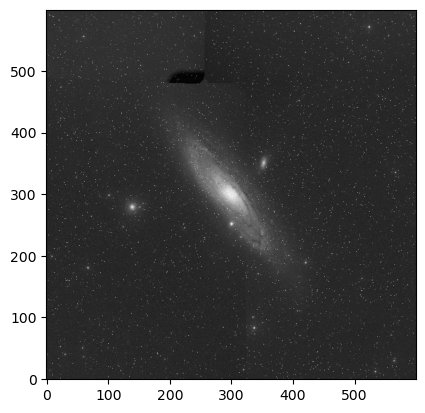

In [27]:
plt.imshow(M31_data, origin='lower', cmap= 'gray')

<img src='skv1001259399386.png' width = 35%>

#### Above image is taken from online survey website. This is more brighter and clearer output for the same data.
#### We will find out what changes on the pixel will bring better output. For the same, lets first understand whats wrong with the first output.  

#### Let's perform some basic study on pixel values with which we got the first output. Using numpy functions we can get the summary details of the pixel data.

In [28]:
#Importing numpy
import numpy as np

In [29]:
#checking min, max, mean, standard deviation of data using numpy
print('Summary stats of M31 Pixels:')
print(f'Maximum Value: {np.max(M31_data)}')
print(f'Minimum Value: {np.min(M31_data)}')
print(f'Mean Value(Average): {np.mean(M31_data)}')
print(f'Standard Deviation: {np.std(M31_data)}')

Summary stats of M31 Pixels:
Maximum Value: 30192.0
Minimum Value: 4819.0
Mean Value(Average): 9374.2880859375
Standard Deviation: 1798.5216064453125


#### From the above stats, we can say that maximum valu of pixel is 179.25 whereas minimum value is 5.35. Average value of 13.26 indicates that most of the pixels are skewed towards the minimum value. Maximum value of 179 depicts that their could be a noise present in the data. 

#### We can find out the pixel value at the brighest spot in our output, which is at the center of the image. These pixel data arrays are generated by telescopes which is focusing at the extreme center of Andromeda Galaxy. We can refer the metadata to get the reference pixel (CRPIX1  = 150.5 / X reference pixel       CRPIX2  = 150.5 / Y reference pixel)

In [30]:
#Checking center pixel data 
M31_data[150,150]

8577.0

In [31]:
M31_data[151, 151]

8539.0

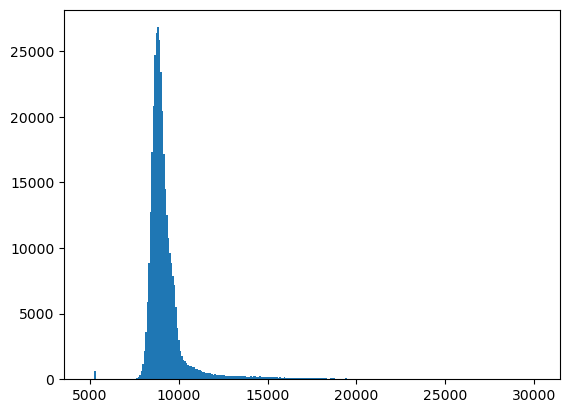

In [32]:
#Plotting distribution of pixels on histogram
#flat function is used as a 1_D iterator over N-dimensional numpy array.
plt.hist(M31_data.flat, bins=300)
plt.show()

### 1. MinMax Scaling

#### For pixel scaling, first we will be using **MinMax Scaling**

<img src='https://playfairdata.com/wp-content/uploads/2022/05/6.-minmax-calc.png' width=25%>

In [33]:
#A common function which can be used to plot the data arrays
def plot_pixels(pixel_array, title, color):
    plt.imshow(pixel_array, cmap='gray', origin='lower')
    plt.title(title, color=color, weight='bold')
    plt.axis('off')

In [34]:
#Creating a function which can be used to compare original image with output with scaled pixels
def compare_pixels(scaled_array, title):
    plt.subplot(1,2,1)
    plot_pixels(M31_data, title='Original Image', color='black')
    plt.subplot(1,2,2)
    plot_pixels(scaled_array, title=title, color='royalblue')
    plt.tight_layout() #to remove gaps and spaces
    plt.show()

#### Following function will take original pixel data array as an input and perform minmax scaling with the help of numpy min max functions. The output will be a scaled array which can be used to plot and compare with original image.

In [35]:
#Lets define a function which performs MinMax scaling and returns scaled pixel array.
def MinMax_Scaling(pixel_array):
    num = pixel_array - np.min(pixel_array)
    denom = np.max(pixel_array) - np.min(pixel_array)
    return num/denom

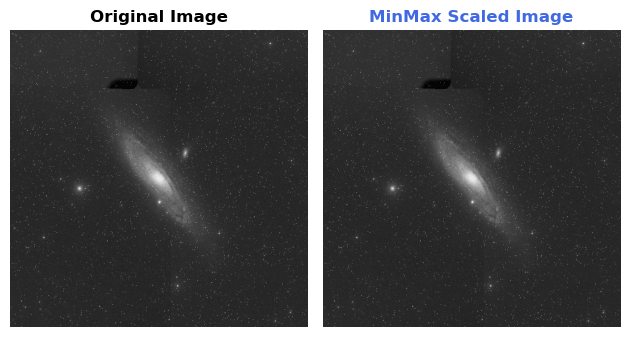

In [36]:
#Normalizing and visualizing  M31 data
minmax_array = MinMax_Scaling(M31_data)
compare_pixels(minmax_array, title='MinMax Scaled Image')

### 2. Standardization or Z Scaling


<img src='https://tse2.mm.bing.net/th?id=OIP.aU-q_bfzwe1ObWyaU3CReQAAAA&pid=Api&P=0&h=180' width=15%>

In [37]:
#Writing a function to standardize pixel array
def zscale(pixel_array):
    num = pixel_array - np.mean(pixel_array)
    den = np.std(pixel_array)
    return num/den

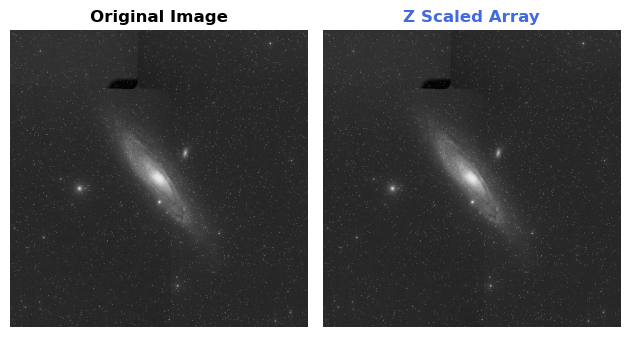

In [38]:
#Visualizing the scaled array
zscaled_array = zscale(M31_data)
compare_pixels(zscaled_array, title='Z Scaled Array')

### 3. Log Normalization

In [39]:
#Writing a function to generate scaled array by Log Normalization
def log_normalization(pixel_array):
    return np.log(pixel_array)

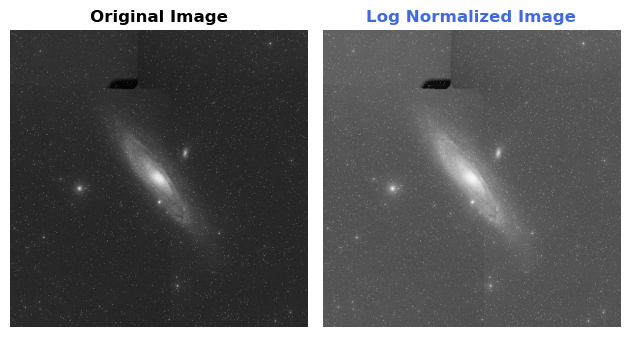

In [40]:
#Comparing output of scaled array with original image
log_norm_array = log_normalization(M31_data)
compare_pixels(log_norm_array, title='Log Normalized Image')


### 4. Square Root Scaling

In [41]:
#Function to perform Square Root Scaling
def sqrt_scaling(pixel_array):
    return np.sqrt(pixel_array)

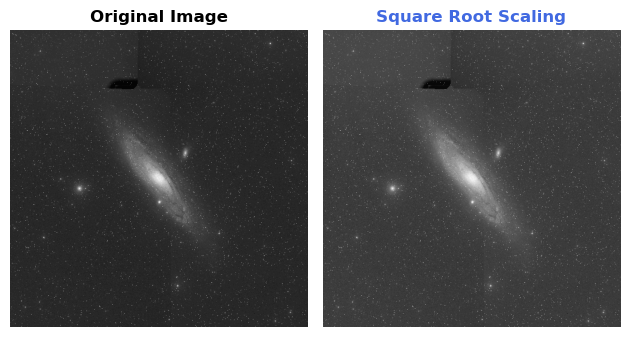

In [42]:
#Comparing output of scaled array with originl image
sqrt_array = sqrt_scaling(M31_data)
compare_pixels(sqrt_array, title='Square Root Scaling')

### Creating a Histogram to show Distribution of Pixels of the best outpur so far

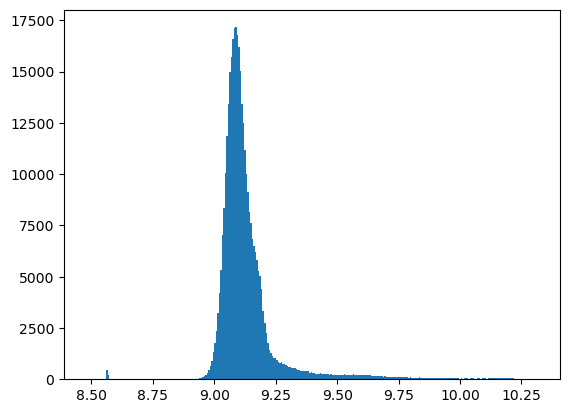

In [43]:
plt.hist(log_norm_array.flat, bins=300)
plt.show()

### 5. ZScaleInterval

#### Basically used to improve the contrast in images. Funtion get_limits() returns the maximum and minimum value in the interval based on the values provided. These min and max values can be used to clip the input array. To clearly see faint objects in your image, you improve contrast by setting vmin and vmax to the sides of the intensity peak of an astronomical object.

In [44]:
#Importing ZScaleInterval class from Astropy library
from astropy.visualization import ZScaleInterval

In [45]:
#Creatung an object of ZScaleInterval class
z = ZScaleInterval()

In [46]:
#Using get_limits() method of ZscaleInterval class to get the vmin and vmax value
z1, z2 = z.get_limits(log_norm_array)

In [47]:
#Printing the vmin and vmax value
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')


Minimum = 8.765376183193034
Maximum = 9.453749184760554


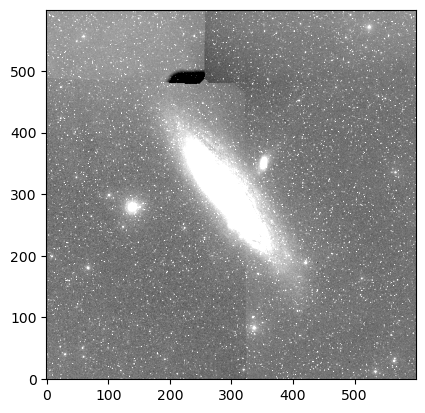

In [48]:
#Plotting the image with clipped array by ZScaleInterval
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [49]:
img

As we can see, image in the form of matplotlib object and we need data in the form of an array. We will use make_image() to convert image object in array.

In [50]:
#Using make_image() with renderer as none and keeping unsampled True to get the same shape array
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [51]:
#Checking image_array
image_array.shape

(600, 600, 4)

#### Here 300 by 300 gives the shape of our newly created image_array, which is matching the shape of an input array. 4 indicates the number of channels present in array (Red, Green, Blue and Alpha)

### In python, we can convert 4 channel image to grayscale using libraries like OpenCV or Pillow.


### 1. OpenCV:
#### OpenCV stands for Open Computer Vision Library, is an open-source computer vision and machine learning library. It is designed to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products. OpenCV contains more than 2,500 optimized algorithms, which can be used for real-time image processing, video capture, and analysis.

#### We can make the use of cvtColor function with BGRA2GRAY argument to convert 4 channel image to grayscale 

### 2. PIllow
#### The Pillow library is a popular and user-friendly Python library for working with images. It is an actively maintained fork of the original Python Imaging Library (PIL) and provides essential image processing capabilities. Pillow is widely used for tasks like opening, manipulating, and saving different image file formats.

#### convert('L') provided Pillow can be used to convert an image to grayscale

In [52]:
#Here we are using OpenCV to convert our scaled image
#Installing and importing openCV
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [53]:
import cv2

In [54]:
#Converting image with cvtcolor function
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [55]:
gray_array

array([[131, 152, 123, ..., 107, 175, 131],
       [140, 146, 113, ..., 120, 107, 126],
       [111, 255, 117, ..., 113, 120, 133],
       ...,
       [166, 152, 153, ..., 143, 230, 146],
       [158, 157, 157, ..., 150, 152, 151],
       [155, 152, 144, ..., 138, 150, 152]], dtype=uint8)

In [56]:
gray_array.shape

(600, 600)

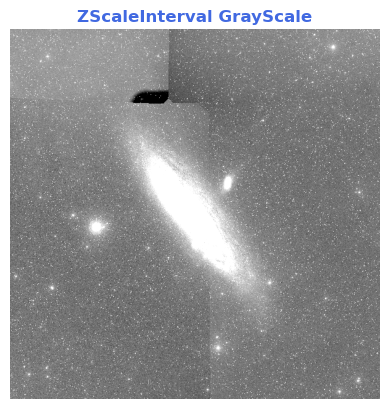

In [57]:
#Plotting image with gray_array
plot_pixels(gray_array, title='ZScaleInterval GrayScale', color='royalblue')

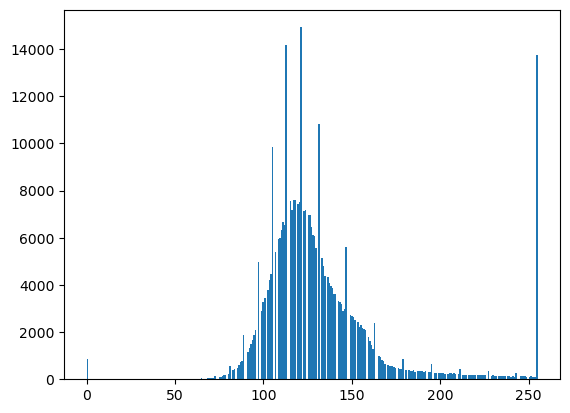

In [58]:
#Plotting distribution using Histogram
plt.hist(gray_array.flat, bins=300)
plt.show()

In [59]:
#Renaming gray_array for ease of use
grayscale_zint_array = gray_array

#### We have seen some of the pixel scaling techniques in order to get clearer outputs of astronomical object data. These techniques help us to compare and choose the most effective scaling method for further analysis. Pixel Scaling provides following benefits : 
#### 1. Aids in identifying fine details in cosmic phenomena
#### 2. Downscaling image when full resolution is not necessary, reducing storage requirements while maintaining essesntial information.
#### 3. Helps in reducing noise, resulting in more accurate data interpretation.
#### 4. Enhanced clearity, revealing hidden details.

In [63]:
%store grayscale_zint_array
%store M31_data

Stored 'grayscale_zint_array' (ndarray)
Stored 'M31_data' (ndarray)
